<a href="https://colab.research.google.com/github/devroopsaha744/MLCOE-TASK1-Usedcars_dataset-EDA/blob/main/MLCOE_task1_EDA_used_cars_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## **Data collection and Cleaning**

In [130]:
df = pd.read_csv("/content/car details v4.csv")

In [131]:
df

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,Diesel,Manual,Surat,White,First,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
2055,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0
2056,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,Petrol,Manual,Thane,Silver,First,Individual,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0
2057,BMW,5-Series 520d Luxury Line [2017-2019],4290000,2018,60474,Diesel,Automatic,Coimbatore,White,First,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.0


In [132]:
df.shape

(2059, 20)

In [133]:
df.isnull().sum()

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64

In [134]:
df.dtypes

Make                   object
Model                  object
Price                   int64
Year                    int64
Kilometer               int64
Fuel Type              object
Transmission           object
Location               object
Color                  object
Owner                  object
Seller Type            object
Engine                 object
Max Power              object
Max Torque             object
Drivetrain             object
Length                float64
Width                 float64
Height                float64
Seating Capacity      float64
Fuel Tank Capacity    float64
dtype: object

In [135]:
df['Engine'] = df['Engine'].str.split(" ").str[0]
df['Engine'] = pd.to_numeric(df['Engine'])

In [136]:
df = df[df['Max Power'].str.split(' ').str[1] == 'bhp']

In [137]:
df['rpm @ max_power'] = df['Max Power'].str.split(' ').str[3]
df['Max Power'] = df['Max Power'].str.split(' ').str[0]

<ipython-input-137-39357eea7a0f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rpm @ max_power'] = df['Max Power'].str.split(' ').str[3]
<ipython-input-137-39357eea7a0f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Max Power'] = df['Max Power'].str.split(' ').str[0]


In [138]:
df['rpm @ max_torque'] = df['Max Torque'].str.split(' ').str[3]
df['Max Torque'] = df['Max Torque'].str.split(' ').str[0]

<ipython-input-138-1a6012c53e5a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rpm @ max_torque'] = df['Max Torque'].str.split(' ').str[3]
<ipython-input-138-1a6012c53e5a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Max Torque'] = df['Max Torque'].str.split(' ').str[0]


In [139]:
df['Max Power'] = pd.to_numeric(df['Max Power'])
df['Max Torque'] = pd.to_numeric(df['Max Torque'])

df['rpm @ max_power'] = pd.to_numeric(df['rpm @ max_power'])
df['rpm @ max_torque'] = pd.to_numeric(df['rpm @ max_torque'])

<ipython-input-139-cbcd0dacac54>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Max Power'] = pd.to_numeric(df['Max Power'])
<ipython-input-139-cbcd0dacac54>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Max Torque'] = pd.to_numeric(df['Max Torque'])
<ipython-input-139-cbcd0dacac54>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [140]:
df.isnull().sum()

Make                   0
Model                  0
Price                  0
Year                   0
Kilometer              0
Fuel Type              0
Transmission           0
Location               0
Color                  0
Owner                  0
Seller Type            0
Engine                 0
Max Power              0
Max Torque             0
Drivetrain             5
Length                 0
Width                  0
Height                 0
Seating Capacity       0
Fuel Tank Capacity    42
rpm @ max_power        4
rpm @ max_torque       0
dtype: int64

In [141]:
df = df.dropna()

In [142]:
df.isnull().sum()

Make                  0
Model                 0
Price                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Engine                0
Max Power             0
Max Torque            0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
rpm @ max_power       0
rpm @ max_torque      0
dtype: int64

In [143]:
df.columns

Index(['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type',
       'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine',
       'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height',
       'Seating Capacity', 'Fuel Tank Capacity', 'rpm @ max_power',
       'rpm @ max_torque'],
      dtype='object')

In [144]:
df

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,rpm @ max_power,rpm @ max_torque
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,...,87.0,109.0000,FWD,3990.0,1680.0,1505.0,5.0,35.0,6000.0,4500
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,...,74.0,190.0000,FWD,3995.0,1695.0,1555.0,5.0,42.0,4000.0,2000
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,...,79.0,112.7619,FWD,3585.0,1595.0,1550.0,5.0,35.0,6000.0,4000
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,...,82.0,113.0000,FWD,3995.0,1745.0,1510.0,5.0,37.0,6000.0,4200
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,...,148.0,343.0000,RWD,4735.0,1830.0,1795.0,7.0,55.0,3400.0,1400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,Maruti Suzuki,Ritz Vxi (ABS) BS-IV,245000,2014,79000,Petrol,Manual,Faridabad,White,Second,...,85.0,113.0000,FWD,3775.0,1680.0,1620.0,5.0,43.0,6000.0,4500
2054,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,Diesel,Manual,Surat,White,First,...,138.0,330.0000,FWD,4585.0,1890.0,1785.0,7.0,70.0,3750.0,1600
2055,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,...,55.0,75.0000,FWD,3495.0,1550.0,1500.0,5.0,32.0,5500.0,4000
2056,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,Petrol,Manual,Thane,Silver,First,...,70.0,102.0000,FWD,3795.0,1680.0,1427.0,5.0,45.0,6250.0,4000


## **Exploratory Data Analysis**

<Axes: xlabel='Kilometer'>

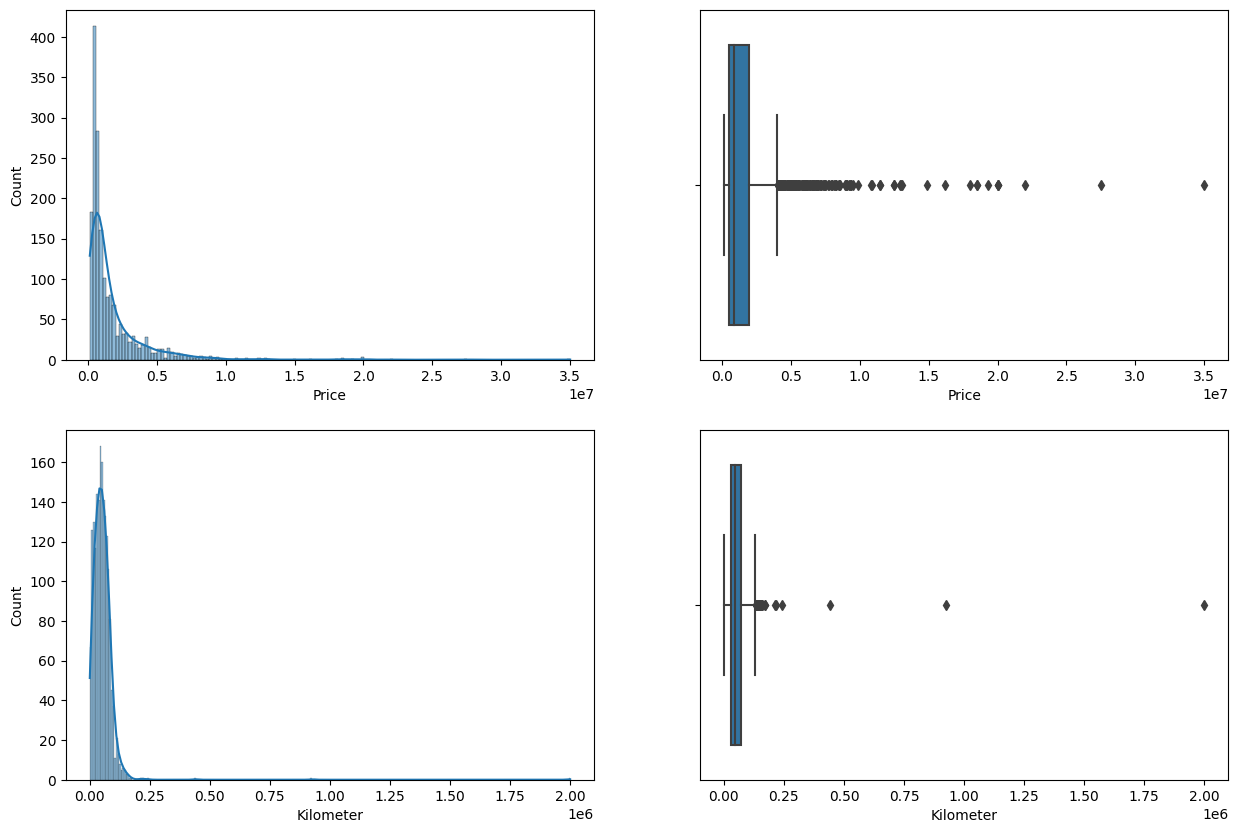

In [145]:
fig, axes = plt.subplots(2, 2, figsize = (15,10))

sns.histplot(x = 'Price', data = df, ax = axes[0][0], kde = True)
sns.boxplot(x = 'Price', data = df, ax = axes[0][1])
sns.histplot(x = 'Kilometer', data = df, ax = axes[1][0], kde = True)
sns.boxplot(x = 'Kilometer', data = df, ax = axes[1][1])

<Axes: xlabel='Max Torque'>

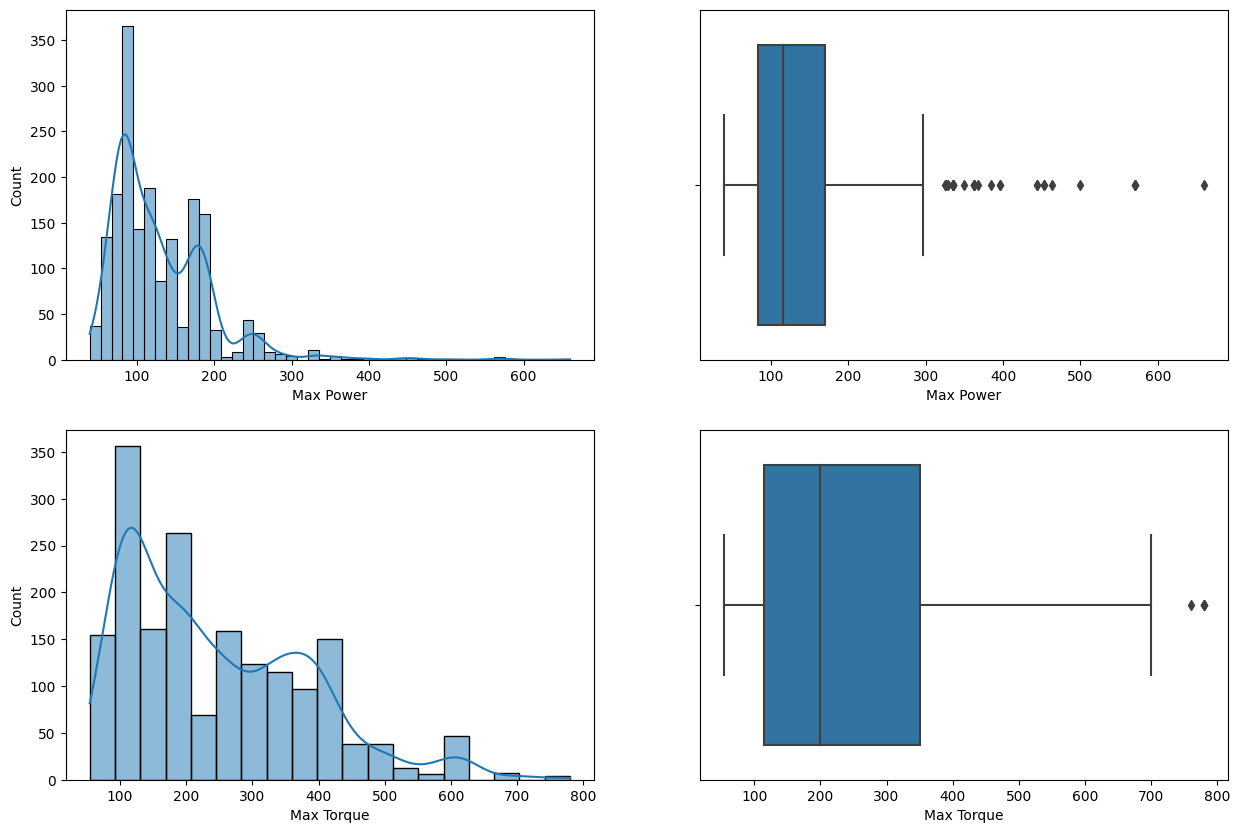

In [146]:
fig, axes = plt.subplots(2, 2, figsize = (15,10))

sns.histplot(x = 'Max Power', data = df, ax = axes[0][0], kde = True)
sns.boxplot(x = 'Max Power', data = df, ax = axes[0][1])
sns.histplot(x = 'Max Torque', data = df, ax = axes[1][0], kde = True)
sns.boxplot(x = 'Max Torque', data = df, ax = axes[1][1])

<Axes: xlabel='rpm @ max_torque'>

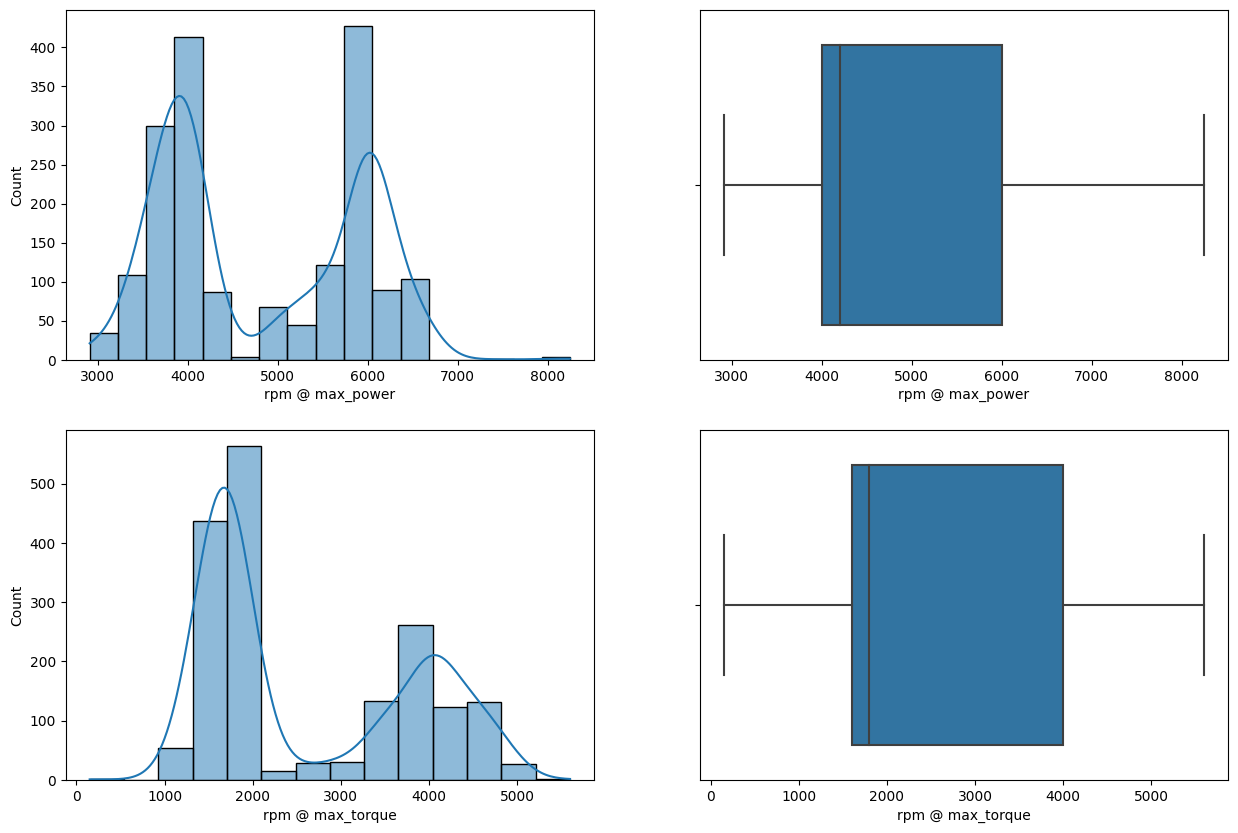

In [147]:
ig, axes = plt.subplots(2, 2, figsize = (15,10))

sns.histplot(x = 'rpm @ max_power', data = df, ax = axes[0][0], kde = True)
sns.boxplot(x = 'rpm @ max_power', data = df, ax = axes[0][1])
sns.histplot(x = 'rpm @ max_torque', data = df, ax = axes[1][0], kde = True)
sns.boxplot(x = 'rpm @ max_torque', data = df, ax = axes[1][1])

<Axes: xlabel='Height'>

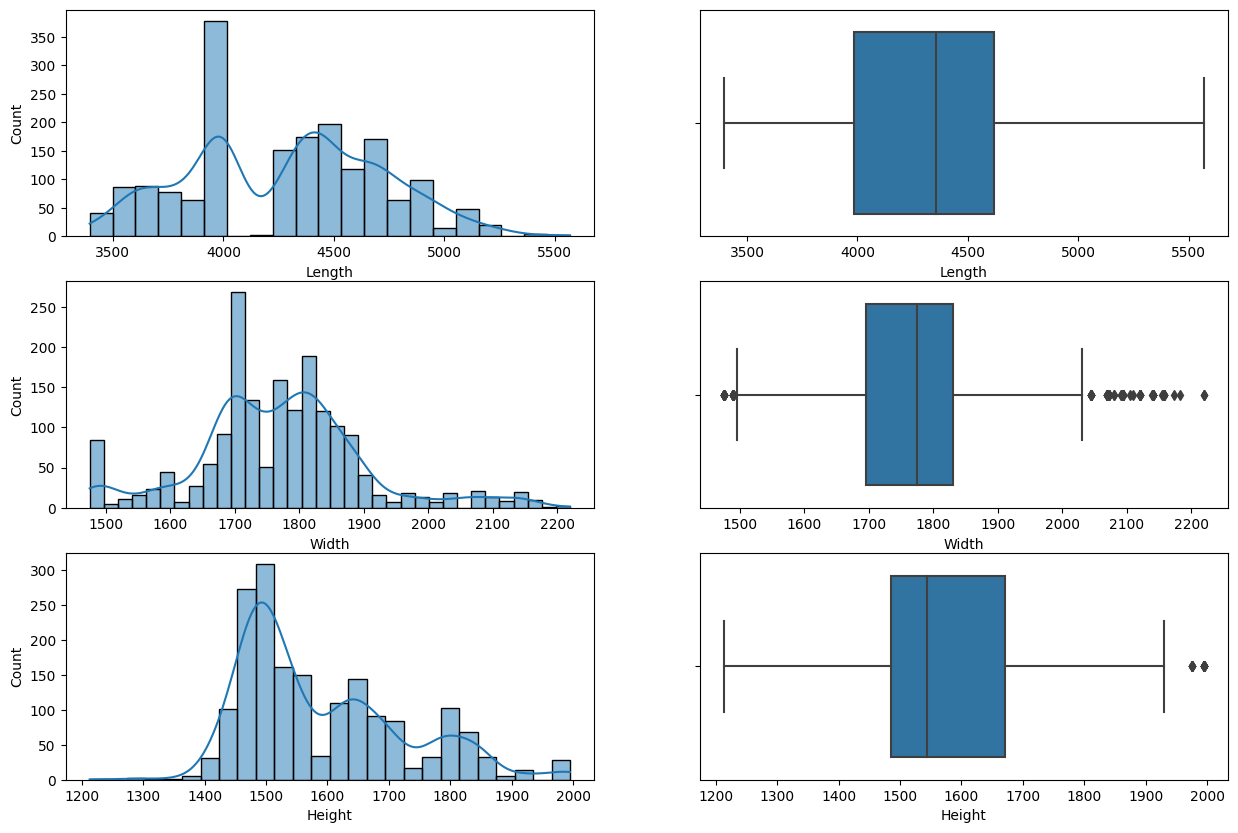

In [149]:
fig, axes = plt.subplots(3, 2, figsize = (15,10))

sns.histplot(x = 'Length', data = df, ax = axes[0][0], kde = True)
sns.boxplot(x = 'Length', data = df, ax = axes[0][1])
sns.histplot(x = 'Width', data = df, ax = axes[1][0], kde = True)
sns.boxplot(x = 'Width', data = df, ax = axes[1][1])
sns.histplot(x = 'Height', data = df, ax = axes[2][0], kde = True)
sns.boxplot(x = 'Height', data = df, ax = axes[2][1])

<Axes: xlabel='Fuel Tank Capacity'>

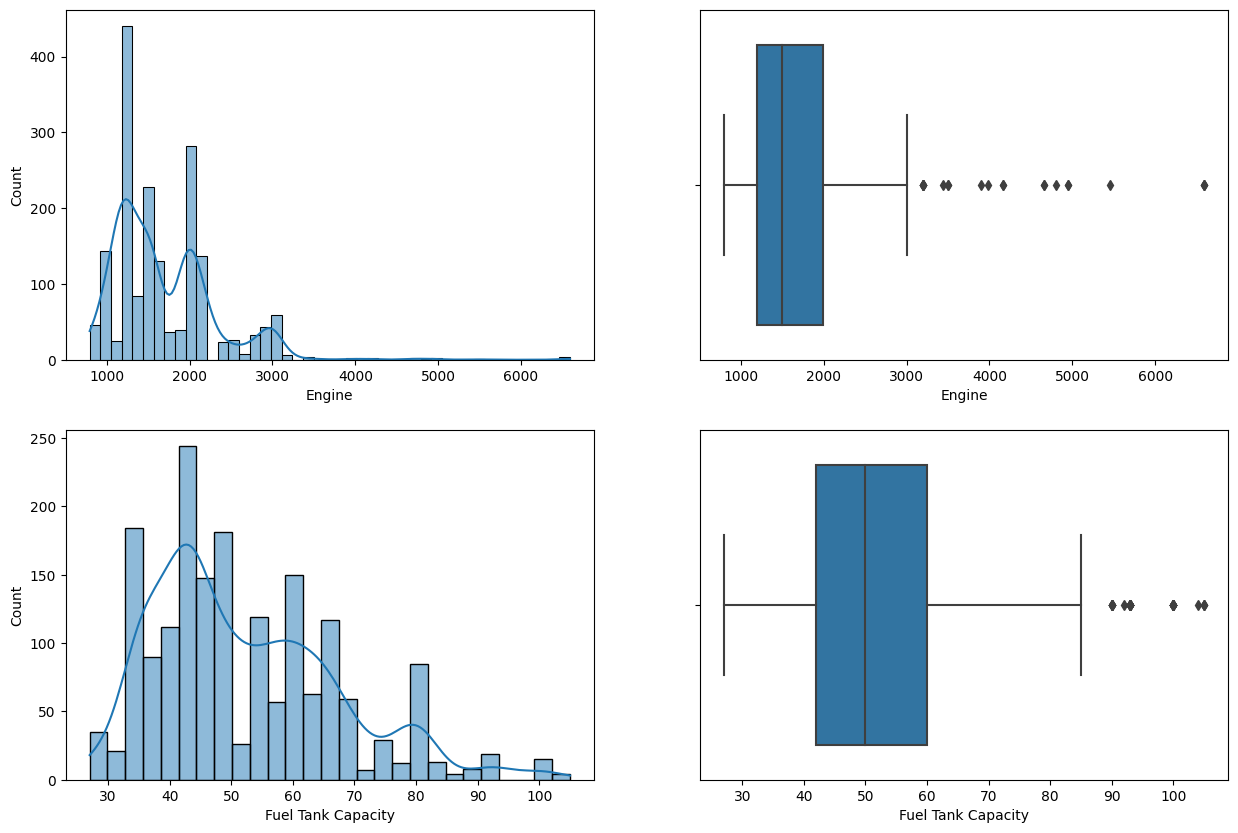

In [151]:
ig, axes = plt.subplots(2, 2, figsize = (15,10))

sns.histplot(x = 'Engine', data = df, ax = axes[0][0], kde = True)
sns.boxplot(x = 'Engine', data = df, ax = axes[0][1])
sns.histplot(x = 'Fuel Tank Capacity', data = df, ax = axes[1][0], kde = True)
sns.boxplot(x = 'Fuel Tank Capacity', data = df, ax = axes[1][1])